![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 18 - Principal Component Analysis</center>
### <center> PCA</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/18_PCA/MainPCA.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt

### Apply PCA to the breast cancer data:

In [2]:
from sklearn.datasets import load_breast_cancer

mX, vY = load_breast_cancer(return_X_y=True)

mX.shape, vY.shape

((569, 30), (569,))

In [3]:
from sklearn.decomposition import PCA

mX -= mX.mean(0)
mX /= mX.std (0)

mZ  = PCA(n_components=2).fit_transform(mX)

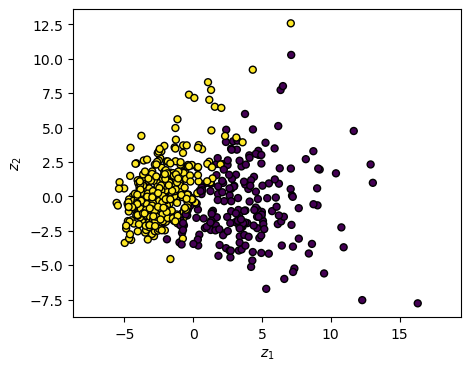

In [4]:
plt.figure (figsize=(5, 4))
plt.scatter(mZ[:,0], mZ[:,1], c=vY, s=25, edgecolor='k')
plt.xlabel ('$z_1$')
plt.ylabel ('$z_2$')
plt.axis   ('equal')
plt.show   ()

### MNIST

In [5]:
from sklearn.datasets import fetch_openml

mX, vY  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
mX     /= 255
N, D    = mX.shape
vSize   = (28, 28)

mX.shape, vY.shape

((70000, 784), (70000,))

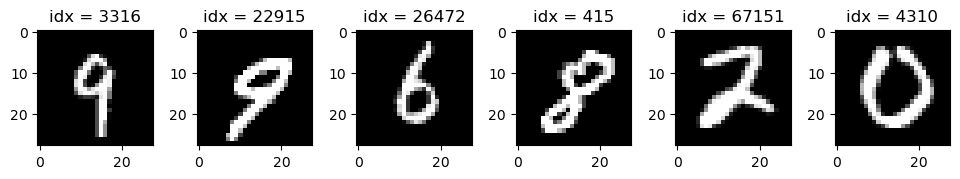

In [6]:
K = 6
_, ax = plt.subplots(1, K, figsize=(12, 1.5))
for kk in range(K):
    idx = np.random.choice(N)
    mI  = np.reshape(mX[idx,:], vSize)
    
    ax[kk].imshow   (mI.clip(0, 1), cmap='gray')
    ax[kk].set_title(f'idx = {idx}')
    
plt.show()

#### Fit a PCA model:

In [7]:
oPCA = PCA(n_components=784).fit(mX)

#### Plot mean:

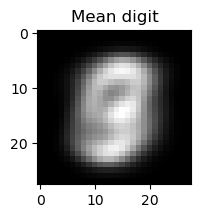

In [8]:
vMean = oPCA.mean_
mI    = np.reshape(vMean, vSize)

plt.figure(figsize=(2, 2))
plt.imshow(mI, cmap='gray')
plt.title ('Mean digit')
plt.show  ()

#### Plot spectrum (eigenvalues):

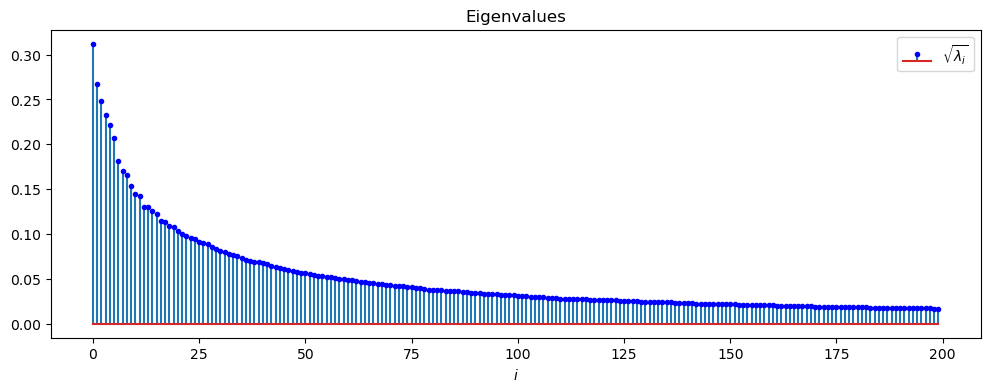

In [9]:
import math
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])

vλ = oPCA.explained_variance_ratio_

plt.figure(figsize=(12, 4))
plt.stem  (np.sqrt(vλ[:200]), markerfmt='b.', label='$\\sqrt{\lambda_i}$')
plt.title ('Eigenvalues')
plt.xlabel('$i$')
plt.legend()
plt.show  ()

#### Plot basis:

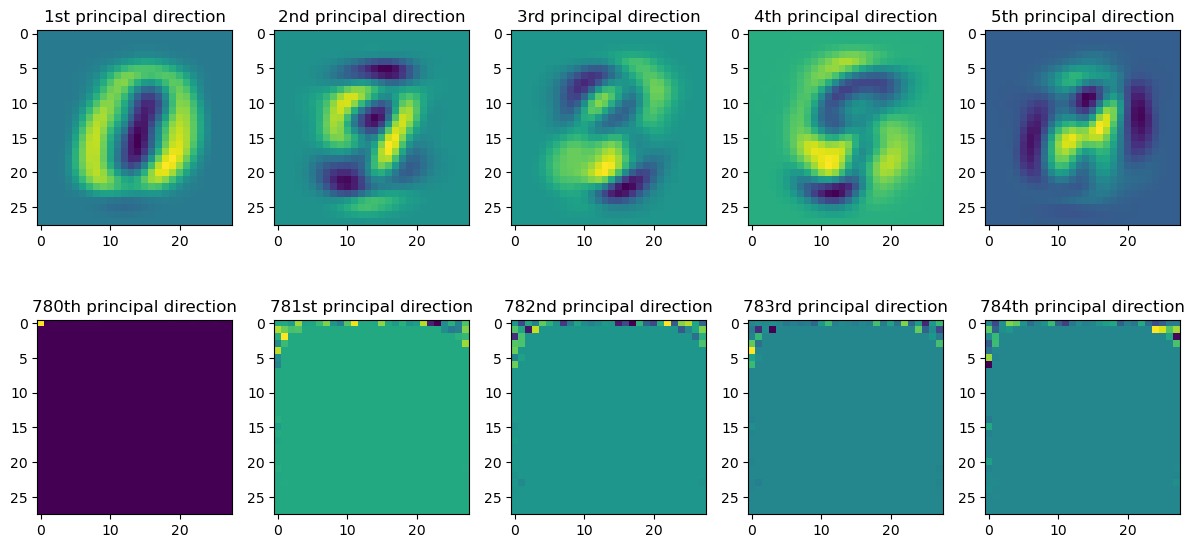

In [10]:
mUd = oPCA.components_ #-- mUd.shape = (d, D)
d   = mUd.shape[0]

fig, _ = plt.subplots(2, 5, figsize=(12, 6))
vIdx   = list(range(5)) + list(range(d-5, d))
for kk, ax in zip(range(10), fig.axes):
    idx = vIdx[kk]
    mI  = np.reshape(mUd[idx], vSize)
    ax.imshow   (mI)
    ax.set_title(f'{ordinal(idx+1)} principal direction')
    
plt.tight_layout()
plt.show        ()

#### Plot reconstruction:
* Encode:
$$\boldsymbol{z}_{i}=\boldsymbol{U}_{d}^{T}\left(\boldsymbol{x}_{i}-\boldsymbol{\mu}_{x}\right)$$  
* Decode:
$$\hat{\boldsymbol{x}}_{i}=\boldsymbol{U}_{d}\boldsymbol{z}_{i}+\boldsymbol{\mu}_{x}$$

In [11]:
idx = 1
vX  = mX [idx]
def PlotReconstruction(d):
    
    if d == 0:
        vZ    = [0]
        vHatX = vMean
    else:
        vZ    = mUd[:d]   @ (vX - vMean) #-- encode
        vHatX = mUd[:d].T @  vZ + vMean  #-- decode
        
    mI   = np.reshape(vX,    vSize).clip(0, 1)
    mRec = np.reshape(vHatX, vSize).clip(0, 1)

    plt.figure (figsize=(12, 6))
    plt.subplot(2,1,1)
    plt.stem   (vZ, label='coefficients', markerfmt='b.')
    plt.xlabel ('principal component')
    plt.legend ()
    
    plt.subplot(2,2,3); plt.imshow(mI,   cmap='gray'); plt.title('Original')
    plt.subplot(2,2,4); plt.imshow(mRec, cmap='gray'); plt.title(f'Reconstruction, d = {d}')
    
    plt.tight_layout()
    plt.show        ()

In [12]:
from ipywidgets import interact, IntSlider, Layout

dSlider = IntSlider(min=0, max=d, step=1, value=0, layout=Layout(width='80%'))
interact(PlotReconstruction, d=dSlider);

interactive(children=(IntSlider(value=0, description='d', layout=Layout(width='80%'), max=784), Output()), _do…

In [13]:
from ipywidgets import interact, FloatSlider, Layout

vSize = (28, 28)
idx   = 1
vZ    = oPCA.transform(mX[[idx]])[0]

def PlotImage(z1, z2, z3, z4, z5, z6, z7, z8, z9, z10):
    
    vZ    = np.array([z1, z2, z3, z4, z5, z6, z7, z8, z9, z10])
    vHatX = mUd[:10].T @ vZ + vMean
    mRec  = np.reshape(vHatX, vSize)

    plt.figure(figsize=(2, 2))
    plt.imshow(np.clip(mRec, 0, 1), cmap='gray')
    plt.show  ()

d = {}
for ii in range(10):
    d[f'z{ii+1}'] = FloatSlider(min=-7, max=7, step=.1, value=vZ[ii], layout=Layout(width='80%'))

interact(PlotImage, **d);

interactive(children=(FloatSlider(value=3.962721582207885, description='z1', layout=Layout(width='80%'), max=7…

### PCA  in a pipe:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.linear_model    import LogisticRegression

d       = 100
oPCA    = PCA               (n_components=d)
oScaler = StandardScaler    ()
oLR     = LogisticRegression(max_iter=200)

oPipe1  = make_pipeline(      oScaler, oLR)
oPipe2  = make_pipeline(oPCA, oScaler, oLR)

print(f'Pipe 1:\n{oPipe1}\n')
print(f'Pipe 2:\n{oPipe2}')

Pipe 1:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])

Pipe 2:
Pipeline(steps=[('pca', PCA(n_components=100)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=200))])


#### Split to train and test:

In [15]:
mTrainX, mTestX, vTrainY, vTestY = train_test_split(mX, vY, random_state=0)

mTrainX.shape, vTrainY.shape

((52500, 784), (52500,))

#### Fit and test pipe1:

In [16]:
oPipe1.fit  (mTrainX, vTrainY)
oPipe1.score(mTestX,  vTestY)

C:\Users\oryai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9099428571428572

#### Fit and test pipe2:

In [17]:
oPipe2.fit  (mTrainX, vTrainY)
oPipe2.score(mTestX,  vTestY)

0.914

### Exercise
* Use the iris data: `load_iris`
* Apply PCA to reduce the dimensionality from $4$ to $2$.
* Plot a scatter plot of the low dimensional features (after the PCA) and color them according to the labels.


In [18]:
from sklearn import datasets

mX, vY = datasets.load_iris(return_X_y=True)
mX.shape, vY.shape

((150, 4), (150,))

In [19]:
dData = datasets.load_iris(as_frame=True)
display(dData.data)
dData.target_names

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
d     = ???
...
mZ    = ???

plt.figure (figsize=(8, 4))
plt.scatter(mZ[:,0], mZ[:,1], c=vY, s=100, edgecolor='k')
plt.xlabel ('$z_1$')
plt.ylabel ('$z_2$')
plt.axis   ('equal')
plt.show   ()

SyntaxError: invalid syntax (<ipython-input-20-6a1042cec142>, line 1)

### Extra exercise
Repeat the this notebook with the face dataset.

In [19]:
from sklearn.datasets import fetch_olivetti_faces

mX, _ = fetch_olivetti_faces(return_X_y=True)
N, D  = mX.shape
vSize = (64, 64)
mX.shape

(400, 4096)

#### Plot some examples:

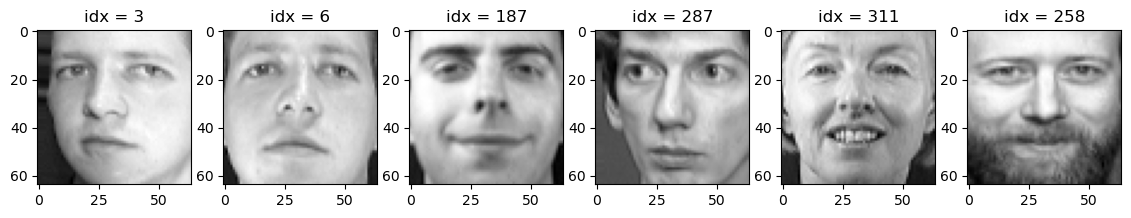

In [27]:
K = 6
_, ax = plt.subplots(1, K, figsize=(14, 2))
for kk in range(K):
    idx = np.random.choice(N)
    mI  = np.reshape(mX[idx,:], vSize)
    
    ax[kk].imshow   (mI, cmap='gray')
    ax[kk].set_title(f'idx = {idx}')

plt.show()

#### Sk-learn:

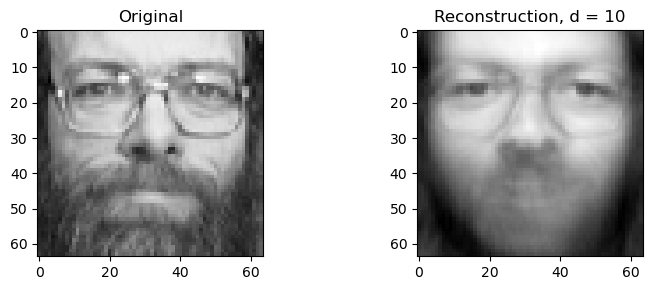

In [31]:
idx   = 360
d     = 10

oPCA  = PCA(n_components=d).fit(mX)

vZ    = oPCA.transform        (mX[[idx]])
vHatX = oPCA.inverse_transform(vZ)

mI   = np.reshape(mX[idx], vSize)
mRec = np.reshape(vHatX,   vSize)

plt.figure(figsize=(8, 3))
plt.subplot(1,2,1); plt.imshow(mI,   cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(mRec, cmap='gray'); plt.title('Reconstruction, d = ' + str(d))

plt.tight_layout()
plt.show        ()